<img src="https://www.cems.uwe.ac.uk/~pa-legg/uwecyber/images/uwe.png" width=300>
<img src="https://www.cems.uwe.ac.uk/~pa-legg/uwecyber/images/uwecyber_acecse_200.jpg" width=300>

# UFCFEL-15-3 Security Data Analytics and Visualisation
# Portfolio Task 4: Fake News Classification (2021)
---

The completion of this worksheet is worth **30%** towards your portfolio for the UFCFEL-15-3 Security Data Analytics and Visualisation (SDAV) module.

### Task
***

In this task, you will need to develop a system that can perform text analytics to classify news articles as either being fake news or true. You should look to use the ***ski-kit learn*** Python library as part of your work - you will find it useful to conduct research and to examine the user guide: [https://scikit-learn.org/stable/user_guide.html](https://scikit-learn.org/stable/user_guide.html). 

The provided dataset has two csv files: one contains 23481 fake news articles, the other contains 21417 true news articles. The data consists of the following columns: title (contains news headlines), text (contains news content/article), subject (type of news), and date (date the news was published).

You will need to consider how to pre-process the data so that it is suitable for further analysis and for use with a machine learning classifier. This will include how the data is structured, how the output class is denoted, any cleansing of the text that may be required (e.g., removal of stopwords, stemming, n-grams).

You should then show how you can deploy 3 different ML classifiers on the data, using the scikit-learn library to achieve this. As an example, you may choose the following 3 algorithms (or you may explore suitable alternatives):

- logreg_cv = LogisticRegression(random_state=0)
- dt_cv=DecisionTreeClassifier()
- nb_cv=MultinomialNB(alpha=0.1) 

You should make use of visualisation to illustrate the distinguishing characteristics of the dataset classes, including the news categories and the top 20 n-grams of the data in each respective class.

You will need to describe the analytical process you have taken using Markdown, and you will need to report your overall final accuracy for the classifier.

### Assessment and Marking
***

| Criteria | 0-39 | 40-49 | 50-59 | 60-69 | 70-84 | 85-100 |
| --- | --- | --- | --- | --- | --- | --- |
| **Suitable use of text pre-processing (30%)** | No evidence of progress | A limited attempt to address this criteria | A working solution but perhaps not optimal | Good approach to the problem | Very good approach to the problem | Excellent approach to the problem |
| **Use of 3 Machine Learning classifiers and reporting their performance (30%)**  | No evidence of progress | A limited attempt to address this criteria |  A working solution but perhaps not optimal | Good approach to the problem | Very good approach to the problem | Excellent approach to the problem |
| **Visualisation techniques to understand the pre-processing and classification stages (20%)**  | No evidence of progress | A limited attempt to address this criteria |  A working solution but perhaps not optimal | Good approach to the problem | Very good approach to the problem | Excellent approach to the problem |
| **Clarity and professional presentation (20%)**  | No evidence of progress | A limited attempt to address this criteria | Some evidence of markdown commentary | Good approach to the problem | Very good approach to the problem | Excellent approach to the problem |

You will need to implement your final solution in the Notebook format, with Markdown annotation -  you should use this notebook file as a template for your submission. You are also expected to complete the assignment self-assessment.

Your submission should include:
- HTML export of your complete assignment in notebook format.
- Original ipynb source file of your notebook.

### Self-Assessment
---

For each criteria, please reflect on the marking rubric and indicate what grade you would expect to receive for the work that you are submitting. For your own personal development and learning, it is important to reflect on your work and to attempt to assess this careful. Do think carefully about both positive aspects of your work, as well as any limitations you may have faced.

- **Suitable use of text pre-processing (30%)**: You estimate that your grade will be 80.

- **Use of 3 Machine Learning classifiers and reporting their performance (30%)**: You estimate that your grade will be 100.

- **Visualisation techniques to understand the pre-processing and classification stages (20%)**: You estimate that your grade will be 80.

- **Clarity and professional presentation (20%)**: You estimate that your grade will be 100.

Please provide a minimum of two sentences to comment and reflect on your own self-assessment:

*I feel I did well on the text pre-processing, however I think I should have used the news categories instead of just dropping the column. I later realised a big portion of the top n-grams were politics related, and so I could have perhaps made use of this.*

*I used 3 different machine learning algorithms and I reported their performance with regards to different metrics (e.g. recall, precision). I also made a confusion matrix for each so I think I met this criteria extremely well.*

*As for the visualisation techniques, I think I could have included one or two more in order to show the pre-rocessing stages. My only visualisation was the ratio between true and false news sources, but I could have perhaps included another.*

*Finally for the clarity and professioanl presentation, I think I did well and made good use of markup, headings, subheadings and so on so that it was clear what I was doing at each stage.*

In [1]:
!pip install pandas numpy matplotlib seaborn wordcloud sklearn 
#! pip install nltk

#Basic libraries
import pandas as pd 
import numpy as np 

#Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Miscellanous libraries
from collections import Counter

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Loading the data


In [2]:
#reading the fake and true datasets
fake_news = pd.read_csv('Fake.csv')
true_news = pd.read_csv('True.csv')

print ("Fake news: ", fake_news.shape)
print ("True news: ", true_news.shape)

Fake news:  (23481, 4)
True news:  (21417, 4)


In [3]:
fake_news.head(10)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017"
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017"
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017"
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017"
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017"


In [4]:
true_news.head(10)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017"
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017"
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017"


The above code will load in the two datasets, showing the overall size of the datasets and also the first 10 rows from each dataset.

Now it is over to you...

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from nltk.corpus import stopwords
import seaborn as sns
import nltk 
import re

# Data Cleaning and Preparation
#### Overview of the data
Let's begin by first checking what the datasets contain.

In [6]:
print(true_news.head(3))
print(fake_news.head(3))

                                               title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devi

#### Removing Date Column

Firstly looking at the columns, the date stands out as a likely useless column that is not a good indication of whether or not a news article is true.

One detail that is immediately obvious is that much of the text is about Donald Trump, who many outlets have written negative articles about. There has also been many claims about the accuracy of these articles, and so the there is likely to be a correlation between the time of his presidency (2016 up up 2020) and the accuracy of the news source. Nevertheless, this is likely a column best left out as in most circumstances the date an article was released is not a good indication of its accuracy.

Therefore, the date column will be dropped from both data sets.

In [7]:
true_news.drop('date', axis=1, inplace=True)
fake_news.drop('date', axis=1, inplace=True)

#### Removing Categories
The data sets must be combined into a single dataframe for training, and so the categories should be checked to decide on how they should be concatinated.

In [8]:
true_news.subject.unique()

array(['politicsNews', 'worldnews'], dtype=object)

In [9]:
fake_news.subject.unique()

array(['News', 'politics', 'Government News', 'left-news', 'US_News',
       'Middle-east'], dtype=object)

As the categories appear to be much different, there isn't a way in which they can be combined while keeping the subject. This is unfortunate, as it's likely there is a pattern between the subject and the reliability. For example, there is likely more motivation to produce fake political news than simply 'worldnews' - although it could also be argued that it would not be a good idea for the classifier to factor in the subject when deciding if an article is true or not.

We will therefor drop the subject columns from both datasets.

In [10]:
true_news.drop('subject', axis=1, inplace=True)
fake_news.drop('subject', axis=1, inplace=True)

#### Defining Classes and Combining Data Sets
As mentioned the datasets have to be combined into a single dataframe to be used as training data. Therefor the dataset must include an indication as to whether or not each article is true or false.

To do this, both dataframes will be combined and a new column will be made to be the new indication as to whether or not an article is true.

In [11]:
#Make a new column in each dataframe indicating their class
fake_news['Class'] = False
true_news['Class'] = True

#Now combine the datasets
data = pd.concat([fake_news, true_news], ignore_index=True,sort=False)

Now let's check the form of the new data to ensure that this has worked correctly.

In [12]:
data.sample(6)

,title,text,Class
41729,Late UK PM Heath had questions to answer over ...,"SWINDON, England (Reuters) - Former British pr...",True
25631,U.S. court rules Arkansas can block Planned Pa...,(Reuters) - A U.S. appeals court on Wednesday ...,True
15980,HA-HA! RETIRED MARINE TROLLS LIBERAL NEW YORKE...,It s always a win-win when you can find a hobb...,False
28401,U.S. House budget panel backs Republican healt...,WASHINGTON (Reuters) - The U.S. House Budget C...,True
41293,How a businessman struck a deal with Islamic S...,RAQQA/DUBAI (Reuters) - While Syrian President...,True
5467,Racist Attacker Accuses Sikh Family Of Terror...,"On July 9, a 28-year-old Washington man broke ...",False


This appears perfect, and so now the datasets have been combined and unnecessary columns have been dropped.

The next step is to look closer at the text and title column contents.

#### Removing Symbols and Links

Now information such as links and random symbols should be removed as these are unlikely to provide any useful information to the machine learning algorithms that will be applied.

Let's have a look at a random article to see what unimportant details might be contained in the data set.

In [13]:
data.iloc[3].text

'On Christmas day, Donald Trump announced that he would  be back to work  the following day, but he is golfing for the fourth day in a row. The former reality show star blasted former President Barack Obama for playing golf and now Trump is on track to outpace the number of golf games his predecessor played.Updated my tracker of Trump s appearances at Trump properties.71 rounds of golf including today s. At this pace, he ll pass Obama s first-term total by July 24 next year. https://t.co/Fg7VacxRtJ pic.twitter.com/5gEMcjQTbH  Philip Bump (@pbump) December 29, 2017 That makes what a Washington Post reporter discovered on Trump s website really weird, but everything about this administration is bizarre AF. The coding contained a reference to Obama and golf:  Unlike Obama, we are working to fix the problem   and not on the golf course.  However, the coding wasn t done correctly.The website of Donald Trump, who has spent several days in a row at the golf course, is coded to serve up the fo

Looking through a few different pieces of text from articles, it's clear there is information that is not needed and will only cause confusion if it is used to train a classifier.

These unwanted details include:
- Twitter Handles (@)
- Time stamps ([])
- Bitfly Links (bit.ly)
- Other html links ('http://' and 'https://')

As they all follow a common pattern, they can be gotten rid of by removing any single word that includes any of these symbols. E.g. if a long word starts with an '@', it is likely a Twitter handle or a link to some other form of social media. Or if is surrounded by square brackets, it is likely a timestamp.

In [14]:
#Remove usernames and handles
data['text'].replace(to_replace='@[^\s]+', value='',inplace=True,regex=True)
#Remove bit.ly links
data['text'].replace(to_replace='bit.ly[^\s]+', value='',inplace=True,regex=True) 
#Remove time stamps (e.g. '[2109 EST]')
data['text'].replace(to_replace=r'[[\w*\s*\-*]*]', value='',inplace=True,regex=True) 
#Remove any empty round brackets
data['text'].replace(to_replace=r'[\([{})\]]', value='',inplace=True,regex=True)
#Remove any other links
data['text'].replace(to_replace=r'http\S+', value='',inplace=True,regex=True)
#Remove any other links
data['text'].replace(to_replace=r'pic.\S+', value='',inplace=True,regex=True)

And doing a final check to ensure the text has properly been cleaned

In [15]:
data.iloc[3].text

'On Christmas day, Donald Trump announced that he would  be back to work  the following day, but he is golfing for the fourth day in a row. The former reality show star blasted former President Barack Obama for playing golf and now Trump is on track to outpace the number of golf games his predecessor played.Updated my tracker of Trump s appearances at Trump properties.71 rounds of golf including today s. At this pace, he ll pass Obama s first-term total by July 24 next year.    Philip Bump  December 29, 2017 That makes what a Washington Post reporter discovered on Trump s website really weird, but everything about this administration is bizarre AF. The coding contained a reference to Obama and golf:  Unlike Obama, we are working to fix the problem   and not on the golf course.  However, the coding wasn t done correctly.The website of Donald Trump, who has spent several days in a row at the golf course, is coded to serve up the following message in the event of an internal server error:

The data set has now been cleansed of links, symbols, timestamps and other pointless information. There is another way in which the data set can be cleased further however.

#### Removing Stopwords

It can be seen that there are also a lot of stopwords (e.g. 'and', 'that' etc) which will provide no useful information for determining whether or not a news article is fake. These should also be removed.

In [16]:
#Download NLTK's current stopwords dictionary
nltk.download('stopwords')
#Create an object which details all English stopwards from the downloaded library
stop = stopwords.words('english')
#Remove all stopwords, and rejoin with a space
data['text'] = data['text'].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stop))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Luke\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
data.iloc[3].text

'on christmas day, donald trump announced would back work following day, golfing fourth day row. the former reality show star blasted former president barack obama playing golf trump track outpace number golf games predecessor played.updated tracker trump appearances trump properties.71 rounds golf including today s. at pace, pass obama first-term total july 24 next year. philip bump december 29, 2017 that makes washington post reporter discovered trump website really weird, everything administration bizarre af. the coding contained reference obama golf: unlike obama, working fix problem golf course. however, coding done correctly.the website donald trump, spent several days row golf course, coded serve following message event internal server error: christopher ingraham december 28, 2017that snippet code appears pages, footer says paid rnc? christopher ingraham december 28, 2017it also as others noted thread, weird code clear would ever actually display, knows. christopher ingraham dec

The data is now properly formatted and contains no stopwords.

#### Checking Class Distrobution

As another check it will be made sure that there are a similar number of fake news articles as there are true. This is important as the model would otherwise develop a bias. For example, if 80% of the articles are fake, the model is unlikely to learn much about what a 'real' article looks like.

Let's make a plot to see whether this is the case.

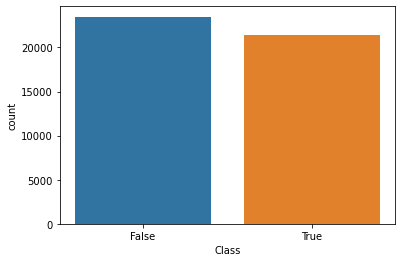

In [18]:
#Create a countplot by count of each 'Class' in the data set
sns.countplot(x ='Class', data = data)

#Show the plot
plt.plot();

Although there is a slight difference between the number of True and False articles, it likely isn't enough to have a negative impact on its suitability for training.

While it would be an option to drop the difference in rows from the 'False' class to make them even, it is thought to likely be better to have the additional data rather than making the number of true and fake articles exactly equal.

#### Top N-Grams of the Classes

Finally, for context of the data sets, let's see the top n-grams for each class to see whether there are any noticeable patterns

In [19]:
#Define a count vectorizer to count the occurances of words in the true data set
word_vectorizer_true = CountVectorizer(ngram_range=(1,1), analyzer='word')
#Create a temporary data set including the fake articles
fake = data[data['Class'] == False]
#Create a matrix of values from the vectorizer, fitted to the temporary data set
sparse_matrix_true = word_vectorizer_true.fit_transform(fake['text'])
#Convert the sum of each word used to an array from the matrix
count = sum(sparse_matrix_true).toarray()[0]
#Create a new data frame with the words from the vectorizer as an index
fakengrams = pd.DataFrame(count, index=word_vectorizer_true.get_feature_names(), columns=['count'])
#Sort by the count so that the most popular are shown first
fakengrams = fakengrams.sort_values(by=['count'],ascending=False)

#Define a count vectorizer to count the occurances of words in the false data set
word_vectorizer_fake = CountVectorizer(ngram_range=(1,1), analyzer='word')
#Create a temporary data set including the true articles
true = data[data['Class'] == True]
#Create a matrix of values from the vectorizer, fitted to the temporary data set
sparse_matrix_fake = word_vectorizer_fake.fit_transform(true['text'])
#Convert the sum of each word used to an array from the matrix
count = sum(sparse_matrix_fake).toarray()[0]
#Create a new data frame with the words from the vectorizer as an index
truengrams = pd.DataFrame(count, index=word_vectorizer_fake.get_feature_names(), columns=['count'])
#Sort by the count so that the most popular are shown first
truengrams = truengrams.sort_values(by=['count'],ascending=False)

#Show the top 20 fake news n-grams
print("Fake News:")
print(truengrams.head(20))
#Show the top 20 true news n-grams
print("True News:")
print(fakengrams.head(20))

Fake News:
            count
said        99053
the         59529
trump       54695
would       31598
reuters     28965
president   28173
state       21020
government  18844
new         16916
states      16647
house       16638
republican  16243
also        15953
it          15638
united      15583
people      15284
year        14776
told        14244
could       13708
one         13393
True News:
           count
trump      79075
the        59355
said       33681
it         29065
president  27631
people     26461
one        24475
would      23489
clinton    19091
obama      18723
like       18041
in         18029
donald     17638
this       17004
he         16537
also       15368
us         14597
news       14573
new        14346
hillary    14065


Interestingly there are immediately a number of patterns visible. Although all of the news categories were combined, many of the most popular words are about politics. This would make sense, as there is perhaps more of an incentive to create false news articles to smear disliked political opponents.

This clearly shows that there are patterns and differences between the different classes, which should be very useful as machine learning algorithms should be able to pick up on them.

#### Pre-Processing Summary

As links have been removed, the only potentially unrelated/irrelevant detail within the data is where certain words/phrases such as 'Source', or 'Source Link:' exist. While it could be argued that these phrases could be in any news article about any subject, whether true or not, it is thought that the inclusion of secondary sources might be a potential indicator of the liklihood a news article is true.

There are also some grammar errors that are often visible in fake articles, and such details like these could be picked up on to indicate potentially false news by the algorithms that will be applied.

The pre-processing is now complete and it's time to move onto creating some models.

# Model Creation
##### The algoriths Support Vector Machine, Multinomial Naive Bayes and Decision Tree will now be applied to the pre-processed data to create different models which may be compared in the next chapter.

### SVM (Support Vector Machine)
Let's start by creating an SVM model.

First let's split the data into training and testing sets. Let's use 80% of the data set for training, and keep the remaining 20% for testing later.

In [20]:
#Split the target (class) from the feature (text) into their own dataframes
target = data['Class']
features = data['text']

#Split the data, with a test size of 20%
#Let's also set a random state of 30, for fair future model comparisons
X_train, X_test, y_train, y_test = train_test_split(features,target, test_size=0.2,random_state=30)

Now let's create a new SVM model and train it based on the training data set.

As the training data we are dealing with is text and not numerical, it will also have to be vectorised before being used to train the model. To accomplish this, the CountVectoriser function of Scikit-Learn will be used. This is a bag-of-words approach and involves counting the number of word occurances - the same method used earlier to find the top 20 n-grams.

In [21]:
#Vectorise the text datasets using CountVectorizer, to convert their contents from text to integers
vectorizer = CountVectorizer(max_features=2000,min_df=5, max_df=0.7)

#Fit the vectoriser
count_vect_fit = vectorizer.fit(X_train)

#Finally apply the fitted vectoriser to the training and testing data sets.
X_train_svm = count_vect_fit.transform(X_train)
X_test_svm = count_vect_fit.transform(X_test)

#Create a new SVM model, with gamma set to auto so that the model will automatically adjust the training example influence
SVMClassifier = svm.SVC(C=1.0, kernel='linear', gamma='auto')

#And finally fit the model to the vectorised training dataset features and target
SVMClassifier.fit(X_train_svm,y_train)

#Let's also get the model's predictions for each row in the test data set, to test how many it got right next
SVMClassifierPredictions = SVMClassifier.predict(X_test_svm)

And finally let's use the test data set to check its accuracy

In [22]:
print("Accuracy: "+str(accuracy_score(y_test, SVMClassifierPredictions)))
print("Precision: "+str(precision_score(y_test, SVMClassifierPredictions)))
print("Recall: "+str(recall_score(y_test, SVMClassifierPredictions)))

Accuracy: 0.9937639198218263
Precision: 0.9950553331763597
Recall: 0.9917859657357427


Already there is a very good start, and the model seems to have an impressive overall accuracy of 99%

### Multinomial Naive Bayes
Let's next use a Multinomial Naive Bayes classifier. This is a suitable algorithm for this task and is commonly used for Natural Language Processing problems.

As an improvement, a different vectorisation algorithm will be used this time as to be more accurate. TfidfVectorizer will be used instead of CountVectorizer, which in addition to counting how many times a word occurs also provides its importance.

Let's split the training data again, as previously it was vectorised with CountVectorizer whereas now we wish to use TfidfVectorizer instead.

In [23]:
#Once again using random state = 30 for a fair comparison later on
#Split the data, with a test size of 20%
X_train, X_test, y_train, y_test = train_test_split(features,target, test_size=0.2,random_state=30)

Now let's vectorise our data with the new function

In [24]:
#Create a TF-IDF vectoriser
vectorizer = TfidfVectorizer(max_features=2000,min_df=5, max_df=0.7)

#Fit the vectoriser to the training data set
tfidf_vect_fit = vectorizer.fit(X_train)

#Finally apply the fitted vectoriser to the training and testing data sets.
X_train_MNB = tfidf_vect_fit.transform(X_train)
X_test_MNB = tfidf_vect_fit.transform(X_test)

And then create and fit a Multinomial Naive Bayes model

In [25]:
#Create a new Multinomial Naive Bayes model
MNBClassifier = MultinomialNB()

#Now fit the model to the vectorised training data set features and target
MNBClassifier.fit(X_train_MNB,y_train)

#Finally get the model's predictions for the X_test data set
MNBClassPredictions = MNBClassifier.predict(X_test_MNB)

Finally check the accuracy

In [26]:
print("Accuracy: "+str(accuracy_score(y_test, MNBClassPredictions)))
print("Precision: "+str(precision_score(y_test, MNBClassPredictions)))
print("Recall: "+str(recall_score(y_test, MNBClassPredictions)))

Accuracy: 0.9250556792873051
Precision: 0.9251184834123223
Recall: 0.9162168505045764


Curiously the accuracy is lower despite the more detailed vectorisation technique, however it still shows an acceptable accuracy of 92%

### Decision Tree
The third and final algorithm to be applied is a Decision Tree classifier.

The data will be split once again, keeping 20% for testing. Once again the TF-IDF vectoriser will be used as opposed to CountVectorizer.

In [27]:
#With random state = 30
#Split the data again, with a test size of 20%
X_train, X_test, y_train, y_test = train_test_split(features,target, test_size=0.2,random_state=30)

#Now apply the TF-IDF vectoriser
vectorizer = TfidfVectorizer(max_features=2000,min_df=5, max_df=0.7)

#Fit the vectoriser
tfidf_vect_fit = vectorizer.fit(X_train)

#Apply the fitted vectoriser to the training and testing data sets
X_train_tree = tfidf_vect_fit.transform(X_train)
X_test_tree = tfidf_vect_fit.transform(X_test)

#Create a new Decison Tree Classifier model
TreeClassifier = DecisionTreeClassifier()

#And now fit the model to the vectorised training data set features and target
TreeClassifier.fit(X_train_tree,y_train)

#Finally get the model's predictions for the training portion of the data set to evaluate its accuracy
TreeClassifierPredictions = TreeClassifier.predict(X_test_tree)

Now testing the accuracy

In [28]:
print("Accuracy: "+str(accuracy_score(y_test, TreeClassifierPredictions)))
print("Precision: "+str(precision_score(y_test, TreeClassifierPredictions)))
print("Recall: "+str(recall_score(y_test, TreeClassifierPredictions)))

Accuracy: 0.9962138084632517
Precision: 0.9976453967506476
Recall: 0.9943675193616522


This model yeilds a very impressive score of 98.7% accuracy, as well as very high recall and precision scores as well.

With all 3 algorithms being used, it's now time to evaluate them to see which performs best for the task of Fake News Classification.

# Model Evaluation
The first thing to do would be to make a table which will show the previously reported scores together so that each classifier can easily be compared.

In [29]:
#Create a dataframe with suitable columns for storing the scores
scores = pd.DataFrame(columns=['Classifier','Accuracy','Precision','Recall'])
#Add the SVM model and its test scores
scores = scores.append({'Classifier': "SVM",
                        'Accuracy' : round(accuracy_score(y_test, SVMClassifierPredictions),3),
                       'Precision' : round(precision_score(y_test, SVMClassifierPredictions),3),
                       'Recall' : round(recall_score(y_test, SVMClassifierPredictions),3),
                       },ignore_index=True)
#Add the Multinomial Naive Bayes model and its test scores
scores = scores.append({'Classifier': "Multinomial Naive Bayes",
                        'Accuracy' : round(accuracy_score(y_test, MNBClassPredictions),3),
                       'Precision' : round(precision_score(y_test, MNBClassPredictions),3),
                       'Recall' : round(recall_score(y_test, MNBClassPredictions),3),
                       },ignore_index=True)
#Add the Decision Tree model and its test scores
scores = scores.append({'Classifier': "Decision Tree",
                        'Accuracy' : round(accuracy_score(y_test, TreeClassifierPredictions),3),
                       'Precision' : round(precision_score(y_test, TreeClassifierPredictions),3),
                       'Recall' : round(recall_score(y_test, TreeClassifierPredictions),3),
                       },ignore_index=True)
#Show the table for comparison
scores

,Classifier,Accuracy,Precision,Recall
0,SVM,0.994,0.995,0.992
1,Multinomial Naive Bayes,0.925,0.925,0.916
2,Decision Tree,0.996,0.998,0.994


It is clear from this that the Decision Tree classifier comes out on top with regards to Accuracy and Recall, as well as overall Accuracy. This would appear to be the best model out of the three, however it should be considered that there are 2 forms of incorrect predictions the models can make (False Negative and False Positive).

If the Decision Tree classifier often makes either False Negative or False Positive predictions, one of the other modles could be better which could be hidden by the fact that the model has a higher overall accuracy. Therefore next a set of confusion matrices will be made to see whether this is the case.

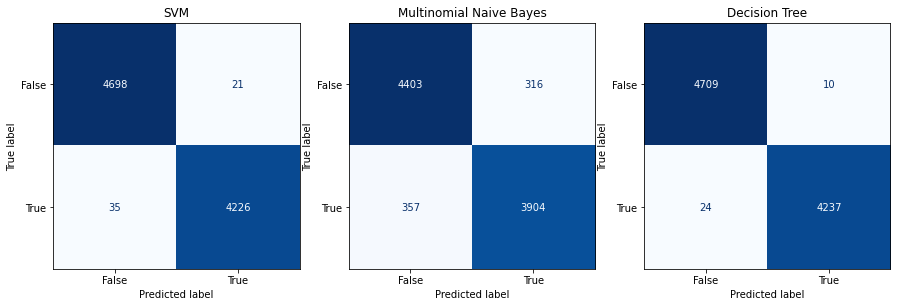

In [30]:
#First make a subplot grid, with one row and three columns wide
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,10))

#Create and plot a confusion matrix for the SVM model in the first cell
plot_confusion_matrix(SVMClassifier,X_test_svm,y_test,ax=ax[0],cmap='Blues',display_labels=SVMClassifier.classes_,colorbar=False)
ax[0].set_title("SVM")

#Create and plot a confusion matrix for the MNB model in the second cell
plot_confusion_matrix(MNBClassifier,X_test_MNB,y_test,ax=ax[1],cmap='Blues',display_labels=MNBClassifier.classes_,colorbar=False)
ax[1].set_title("Multinomial Naive Bayes")

#Create and plot a confusion matrix for the Decision Tree model in the third cell
plot_confusion_matrix(TreeClassifier,X_test_tree,y_test,ax=ax[2],cmap='Blues',display_labels=TreeClassifier.classes_,colorbar=False)
ax[2].set_title("Decision Tree")

#Finally let's show the subplots
plt.show();

There is an interesting variance between the models with regards to what false predictions are made. The Multonomial Naive Bayes model appears to make an even number of False Negative and False Positive predictions, however it is known to have the lowest accuracy of the three.

SVM appears to be making many more False Positive predictions, meanwhile it makes comparatively few (almost half as many) False Negative predictions making it more one sided.

A similar pattern is seen with the Decision Tree model, where it seems to be making more False Positive predictions than False Negative predictions. Although it would be more ideal that there was an even number of incorrect predictions (as this would mean the accuracy score is more reliable), the difference is small and so it can safely be said that the Decision Tree model is the best.

### Summary
Moving forwards, the Decision Tree classification model is the most accurate and is the most suitable for deployment. It has an impressive __overall accuracy of 99%__, making it ideal for reliably classifying whether or not an article is true or fake.